### Predicting Employee Productivity Using Tree Models

**Summary:** The garment industry is one of the key examples of the industrial globalization of the modern era.
It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.
So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.

**Objective:** Find features which help increase employee productivity. What can firms do to achieve their productivity targets? What features lead to lower producuvity so decision makers can mitigate or minimize these features?

**Goal:** Predict the productivity performance of the working teams in their factories.

**Data:** The original dataset is in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees).

### Import libraries

In [1]:
# Its always a good idea to import all the important libraries in the starting to avoid errors later.
# We will keep adding more libraries here as we progress in our project.f

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Explore the dataset
Start our project by importing the dataset into our jupytre notebook.

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')
print(df.shape)
df.head()

(1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


The data source gives us the following information about the features(columns):

- date : Date in MM-DD-YYYY
- day : Day of the Week
- quarter : A portion of the month. A month was divided into four quarters
- department : Associated department with the instance
- team_no : Associated team number with the instance
- no_of_workers : Number of workers in each team
- no_of_style_change : Number of changes in the style of a particular product
- `targeted_productivity` : Targeted productivity set by the Authority for each team for each day.
- smv : Standard Minute Value, it is the allocated time for a task
- wip : Work in progress. Includes the number of unfinished items for products
- over_time : Represents the amount of overtime by each team in minutes
- incentive : Represents the amount of financial incentive (in BDT) that enables or     motivates a particular course of action.
- idle_time : The amount of time when the production was interrupted due to several reasons
- idle_men : The number of workers who were idle due to production interruption
- `actual_productivity` : The actual % of productivity that was delivered by the workers. It  ranges from 0-1.

Let's see a brief description of each column

In [3]:
#Descriptive Statistics on numerical columns
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [4]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Some exploratory observations:

- We have only one column where there are null values('wip').
- We have the minimum targeted_productivity at 0.07 which needs to be explored for why that is.
- The 'idle_men' and 'idle_time' column has min, median, and 75% of 0, and a mean very close to 0. The max being 45 indicates very few or a single outlier which could be removed.

Let's get a value count of categorical columns of our dataset.

In [5]:
value_count_quarter = df['quarter'].value_counts()
value_count_department = df['department'].value_counts()
value_count_day = df['day'].value_counts()
print(value_count_quarter)
print(value_count_department)
print(value_count_day)

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64
department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64


The 'finishing' variable in the department column appears as two different variables for some reason. Let's further explore the anamoly and correct it.

### Data Cleaning
Let's start with correcting the `department` column.

In [7]:
#In Python, lambda is a keyword used to create small, anonymous functions. It's often used when you need a quick, one-time function that doesn't need to be reused elsewhere in your code.
#Example:
#double = lambda x: x * 2
#print(double(5))  # Output: 10


length_department = df['department'].apply(lambda x: (x, len(x)))
length_value_count = length_department.value_counts()
print(length_value_count)

(sweing, 6)         691
(finishing , 10)    257
(finishing, 9)      249
Name: department, dtype: int64


We can see that one 'finishing' is a 9 character string while other 'finishing ' is a 10 character string. We can remove the extra space from the 'finishing ' to make it similar to the other variable.

In [6]:
df['department'] = df['department'].str.strip()
print(df['department'].value_counts())

department
sweing       691
finishing    506
Name: count, dtype: int64


Now let's shift our focus to 'target_productivity' column where we saw a minimun value of 0.07.

In [7]:
df['targeted_productivity'].value_counts(normalize=True) * 100

targeted_productivity
0.80    45.112782
0.70    20.217210
0.75    18.045113
0.65     5.263158
0.60     4.761905
0.50     4.093567
0.35     2.255639
0.40     0.167084
0.07     0.083542
Name: proportion, dtype: float64

More than 80% of times, the targeted productivity was above 70%, which seems like a reasonable productivity target. Let's inspect what the actual productivity was when the targeted productivity was below 0.3.

In [8]:
productivity = df[df['targeted_productivity'] < 0.3]
print(productivity[['targeted_productivity', 'actual_productivity']])

     targeted_productivity  actual_productivity
633                   0.07             0.522845


The value 0.07 seems like a typo and the only targeted output below 0.3. We can change the value to the nearest targeted output of 0.35. While we are at it, we can also create a new column which states whether the employees reached targeted productivity at that instance or not.

In [9]:
df.loc[633, 'targeted_productivity'] = 0.35

In [10]:
df['target_achieved'] = df.apply(lambda x: 'yes' if x['actual_productivity'] >= x['targeted_productivity'] else 'no', axis=1)
print(df['target_achieved'].value_counts(normalize=True))

target_achieved
yes    0.730994
no     0.269006
Name: proportion, dtype: float64


We can observe that we achieved our target 73% of the times.

We can shift our focus to 'wip' column where we found null values. After researching a bit, it was concluded that a null wip could mean that there is no work in progress at that time, hence we can fill the null values with 0 or remove the column all together so it doesn't affect our tree.

Since 'idle_men' and 'idle_time' both just contain outlier values, it makes sense to remove these columns too.

In [11]:
df = df.drop(['wip', 'idle_men', 'idle_time', 'date'], axis=1)

### Feature Selection

We can now start examining our predictors against our target variable, that is, actual_productivity to determine how our features correlate with productivity. Let's start by figuring out how many unique variables are in each column to seperate them into categorical and continuous variables.

In [12]:
df.nunique()

quarter                    5
department                 2
day                        6
team                      12
targeted_productivity      8
smv                       70
over_time                143
incentive                 48
no_of_style_change         3
no_of_workers             61
actual_productivity      879
target_achieved            2
dtype: int64

In [13]:
categorical_columns = ['quarter', 'department', 'day', 'team', 'no_of_style_change']
continuos_columns = ['smv', 'over_time', 'incentive', 'no_of_workers']

Let's make a boxplot for our categorical variables to see it's relationship with 'actual_productivity'

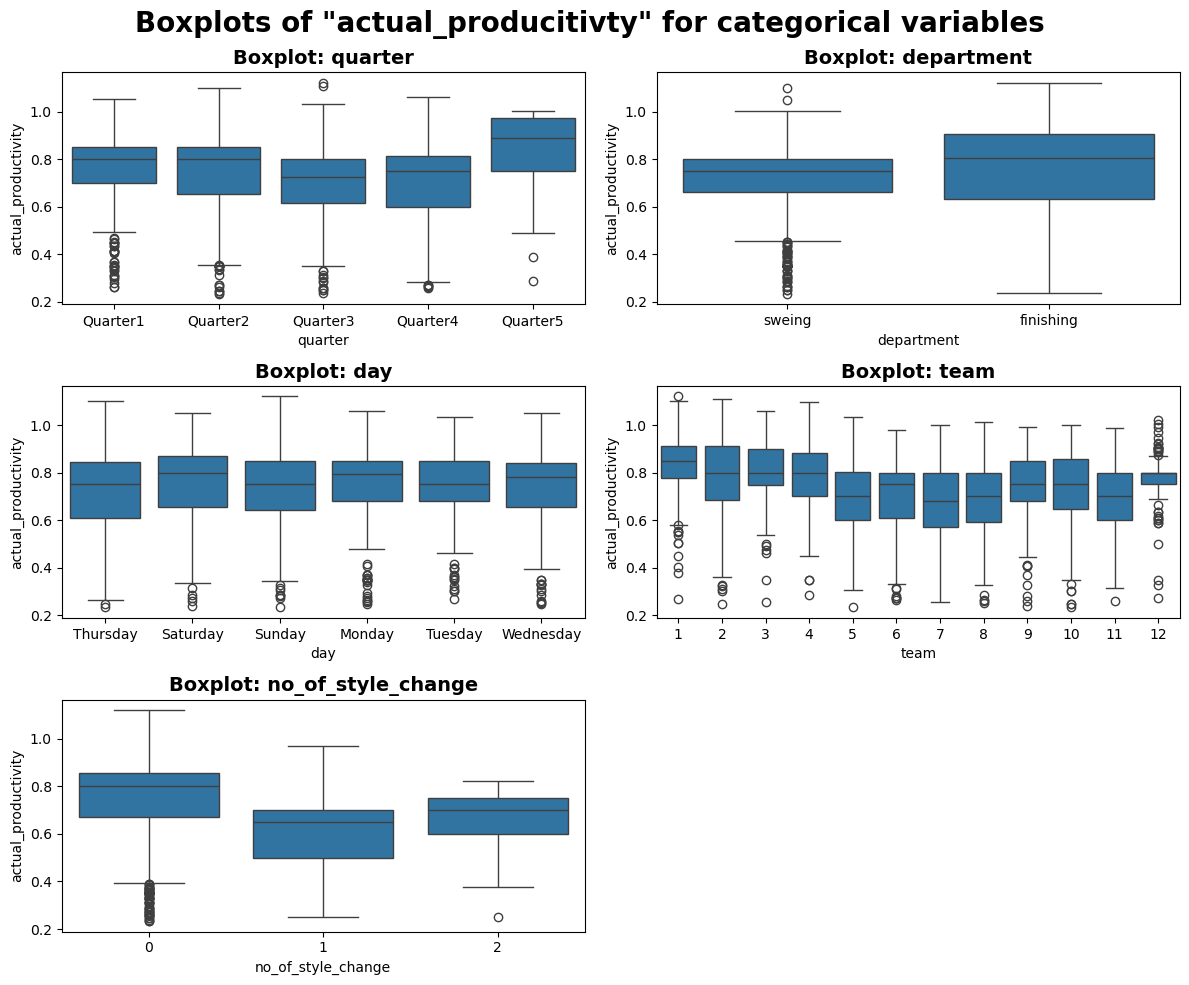

In [14]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
ax = ax.flatten()

fig.suptitle('Boxplots of \"actual_producitivty\" for categorical variables ',
            fontsize=20, fontweight='bold')

for i, cat in enumerate(categorical_columns):
    sns.boxplot(x=cat, y='actual_productivity', data=df, ax=ax[i])
    ax[i].set_title(f"Boxplot: {cat}", fontsize=14, weight='bold')
    
ax[5].axis('off')

plt.tight_layout()
plt.show()

Some Observations:

- Quarter 5 has a higher median productivity compared to other quarters, but other quarters have intances of absolute higher productivity.
- Both finishing and sewing departments have almost similar level of productivity.
- The day of the week doesn't seem to affecting productivity.
- Every team seems to have some instances of low productivity, but they are mostly outliers. There seems to be no clear distinction among teams regarding their productivity levels.
- The productivity starts to take a hit as the number of style changes start to increase.

Let's now determine how our continuous variable fare against actual productivity through a scatterplot.

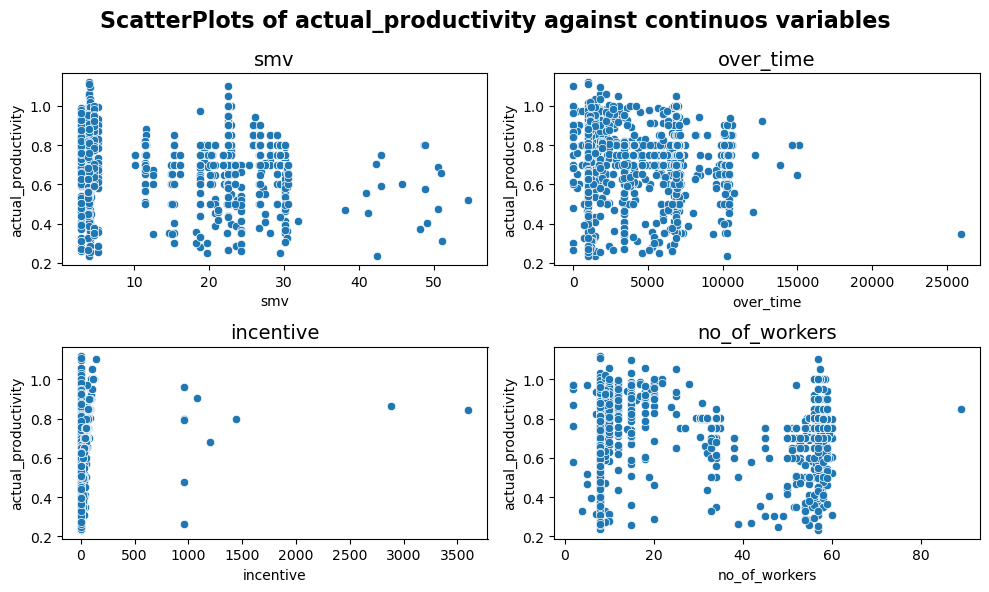

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()

plt.suptitle("ScatterPlots of actual_productivity against continuos variables", fontsize=16, weight='bold')

for i, col in enumerate(continuos_columns):
    sns.scatterplot(x=col, y='actual_productivity', data=df, ax=ax[i])
    ax[i].set_title(col, fontsize=14)
    
plt.tight_layout()
plt.show()

None of the numerical variables show a meaningful relation with productivity. Even with low incentives, the productivity seems to be ranging anywhere between 0 to 1.2, although this could be due to the fact that there are not many data points with regard to higher incentives. The number of workers also doesn't seem to be affecting productivity in any way. Lower number of workers and higher number of workers seems to be yeilding same amount of work.

### Building the Classification Tree
Before we start buliding our classifier, let's complete some preprocessing work.

In [17]:
# use encoder for columns that are categorical or where the numbers cannot be ranked
# sci-kit learn can only use numerical columns

#instantiate the OneHotEncoder class
encoder = OneHotEncoder(sparse_output=False)

df_encoded = encoder.fit_transform(df[['quarter', 'department', 'day', 'team']])
encoded_column_names = encoder.get_feature_names_out(input_features=['quarter', 'department', 'day', 'team'])
encoded_df = pd.DataFrame(df_encoded, columns = encoded_column_names)

df_coded = pd.concat([df, encoded_df], axis=1)
df_coded = df_coded.drop(['quarter', 'department', 'day', 'team'], axis=1)

Let's start by making a simple 3 level tree using the data.

In [18]:
X = df_coded.drop(['actual_productivity', 'target_achieved'], axis=1)
y = df_coded['target_achieved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

model = DecisionTreeClassifier(max_depth=3)

Let's fit our tree on the training data and follow it with the accuracy on the test data after which we will plot our tree and try to make sense of it.

In [19]:
model.fit(X_train, y_train)

tree_score_test = model.score(X_test, y_test)
print(f'Accuracy on test data: {round(tree_score_test, 2)*100}%')

Accuracy on test data: 82.0%


### Plotting the tree

The Gini impurity is a measure of the impurity or uncertainty in a dataset, and it's commonly used in decision trees to determine the best splits.
The Gini impurity is a metric that measures the probability of misclassifying an observation if it were randomly classified according to the distribution of classes in the dataset. 
In other words, it measures the "impurity" or uncertainty in the dataset.

A Gini impurity of:

- 0 indicates that the dataset is perfectly pure, meaning all observations belong to the same class.
- 0.5 indicates that the dataset is randomly distributed, meaning that the probability of misclassifying an observation is maximum.

Values close to 0 indicate a high degree of purity, while values close to 0.5 indicate a high degree of impurity.

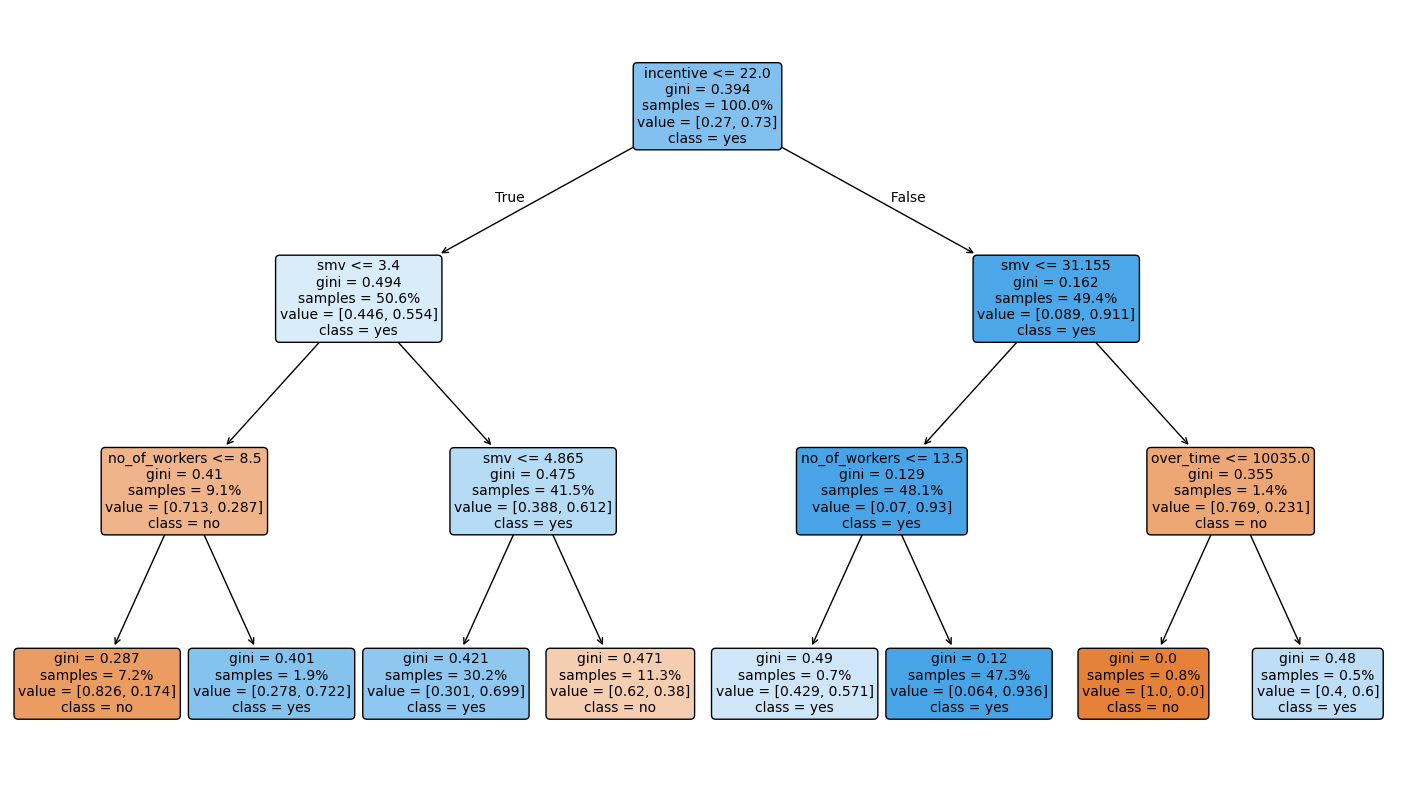

In [20]:
plt.figure(figsize=(18, 10))

feature_names = X.columns.tolist()
class_names = model.classes_.tolist()
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, proportion=True,
          precision=3, rounded=True, fontsize=10)
plt.show()

### Understanding the tree
Let's define a simple understanding of the tree.

- The leaf node with the most samples has a sample percentage of 47% which belongs to the yes class(target achieved). It reached it's destination with the following proccess - incentives more than 22, smv less than 31 and then no_of_workers more than 13.5. This leaf has a very low gini impurity at just 0.12 which is great!!
- The leaf which has the lowest gini impurity is at 0, and belongs to the 'no' class(target not achieved). Although this branch of our tree is not a very good predictor of the class since it only represents 0.8% of the samples of the training data.
- The highest percentage of samples in the 'no' class is with 11.3% but has gini impurity of 0.47, hence also not a good predictor of the class.

It seems like our tree is better at predicting the 'yes' class than it is at predicting the 'no' class.

Remember: A Gini impurity of:

- 0 indicates that the dataset is perfectly pure, meaning all observations belong to the same class.
- 0.5 indicates that the dataset is randomly distributed, meaning that the probability of misclassifying an observation is maximum.

Values close to 0 indicate a high degree of purity, while values close to 0.5 indicate a high degree of impurity.


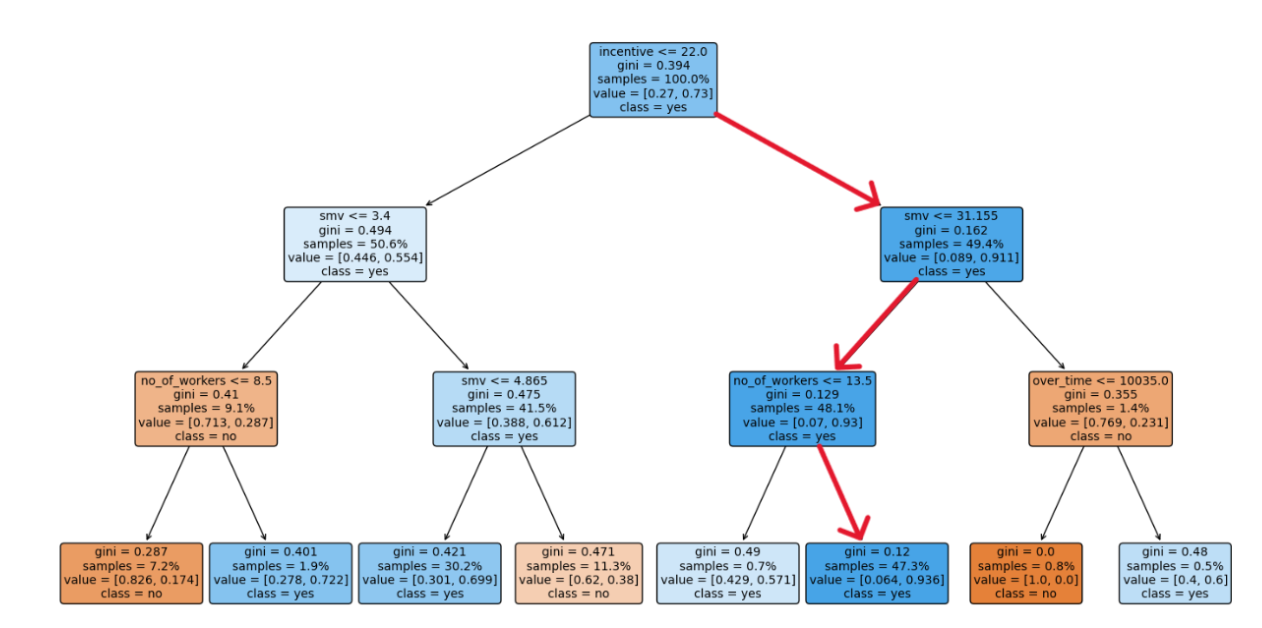

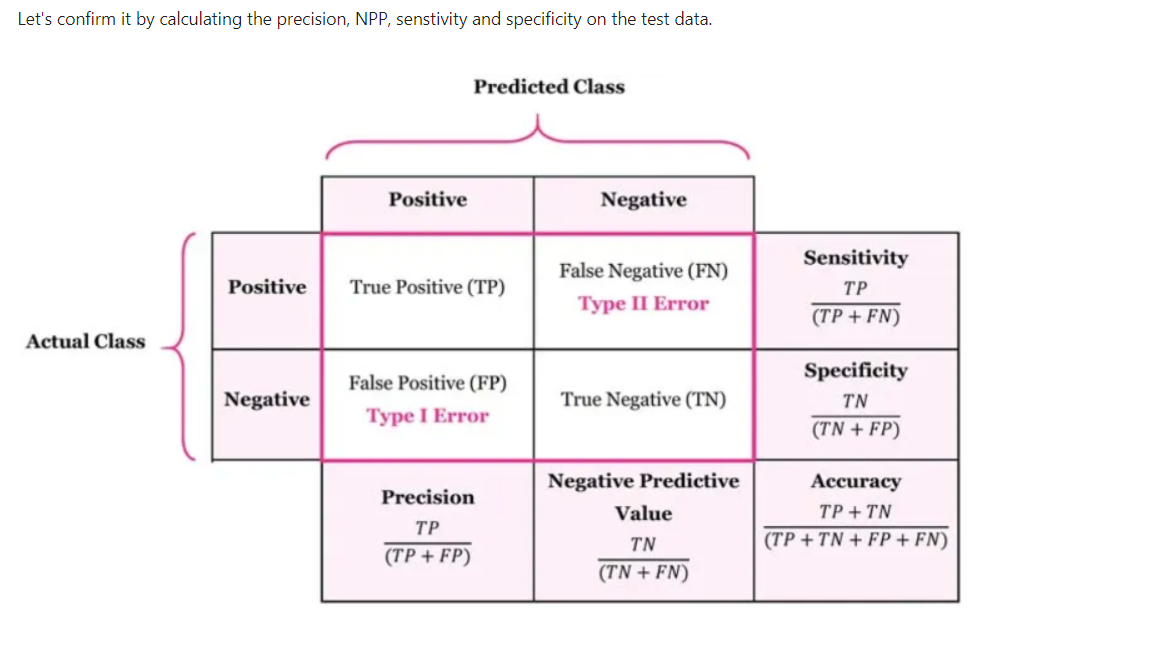

True Negatives: 31
False Positives: 33
True Positives: 166
False Negatives: 10


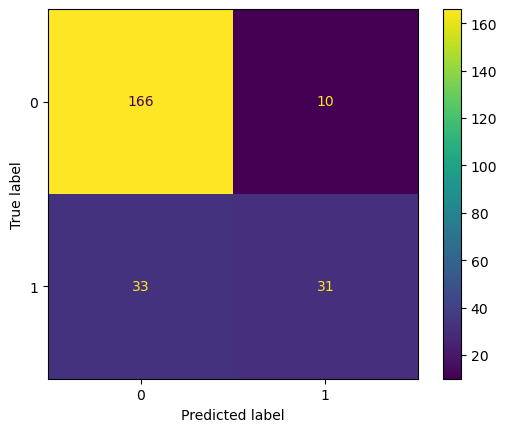

In [21]:
y_pred = model.predict(X_test)
class_labels = ['yes', 'no']
confusion_matrix_tree = confusion_matrix(y_test, y_pred, labels=class_labels)

tn = confusion_matrix_tree[1, 1]  # True Negatives
fp = confusion_matrix_tree[1, 0]  # False Positives
tp = confusion_matrix_tree[0, 0]  # True Positives
fn = confusion_matrix_tree[0, 1]  # False Negatives

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_tree).plot()
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'True Positives: {tp}')
print(f'False Negatives: {fn}')

In [22]:
senstivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Senstivity on test data: {round(senstivity, 2)}')
print(f'Specificity on test data: {round(specificity, 2)}' )

Senstivity on test data: 0.94
Specificity on test data: 0.48


As predicted earlier, the model is better at predicting the 'yes' class than it is at predicting the 'no' class. Let's print a final classification report and then try to optimize our decision tree.

**The Origins of Sensitivity and Specificity Names**

The names "sensitivity" and "specificity" come from the medical field, where these metrics were first used to evaluate the performance of diagnostic tests.

Sensitivity gets its name because it measures how sensitive a test is to detecting true positives. In other words, a test with high sensitivity is able to detect most of the true positive cases.

Specificity gets its name because it measures how specific a test is to detecting true negatives. In other words, a test with high specificity is able to rule out most of the true negative cases.

In the context of medical diagnosis, sensitivity and specificity are crucial because they help doctors understand the reliability of a test. For example, a test with high sensitivity but low specificity might detect many true positive cases, but also produce many false positive results. On the other hand, a test with high specificity but low sensitivity might be very accurate for ruling out negative cases, but might miss many true positive cases.

In machine learning and data science, we've adopted these metrics to evaluate the performance of our models, and the names have stuck!

**Classification Report**

A classification report is a summary of the main classification metrics for a model, including precision, recall, F1 score, and support. It provides a comprehensive overview of a model's performance on a classification task.

Here's a breakdown of each component in a classification report:

**Precision**
Precision measures the proportion of true positives among all positive predictions made by the model. In other words, it measures the accuracy of the model's positive predictions.

**Recall**
Recall measures the proportion of true positives among all actual positive instances. In other words, it measures the model's ability to detect all positive instances.

**F1 Score**
The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall.

**Support**
Support refers to the number of actual instances for each class. It's useful for understanding the class distribution in the dataset.

In a classification report, these metrics are typically presented in a table format, with each row representing a class in the dataset. The columns represent the different metrics: precision, recall, F1 score, and support.

In [23]:
report = classification_report(y_test, y_pred)
print(report)

#By examining the classification report, you can gain insights into a model's strengths and weaknesses, and identify areas for improvement.

              precision    recall  f1-score   support

          no       0.76      0.48      0.59        64
         yes       0.83      0.94      0.89       176

    accuracy                           0.82       240
   macro avg       0.80      0.71      0.74       240
weighted avg       0.81      0.82      0.81       240



### Cost Complexity Pruning

The thing with decision trees is, if you were to make a decision tree without specifying a max depth, minimum leaf split or a minimum samples split, the tree would grow to its full extent which provides a 100% accuracy on the training data. **But the moment you run the testing data through it, the predictions fall flat.**

Let's prove this by making one!!


In [24]:
X = df_coded.drop(['actual_productivity', 'target_achieved'], axis=1)
y = df_coded['target_achieved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

model = DecisionTreeClassifier() # A decison tree with no constraints

In [25]:
model.fit(X_train, y_train)

tree_score_train = model.score(X_train, y_train)
tree_score_test = model.score(X_test, y_test)

print(f'Score on the training data: {round(tree_score_train, 2)*100}%')
print(f'Score on the test data: {round(tree_score_test, 2)*100}%')

Score on the training data: 100.0%
Score on the test data: 77.0%


As mentioned earlier, the accuracy achieved on the training data is a full 100%, but the accuracy achieved on the testing data is lower than that of a simple 3 level tree. So what is the optimal size of the tree that gives the best predictions even on the testing data? This is where Cost Complexity Pruning comes in!

The main idea behind cost complexity pruning is to make a lot of different size trees, starting from a full grown tree and then gradually reducing(pruning) it's size by using something called an alpha. We start with an alpha = 0 at which point the tree is full grown as the penalty for having leaves is 0! We then start increasing the alpha and the leaves start reducing since now having more leaves gives you a penalty.

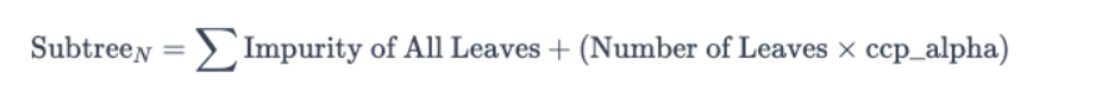

In the end, we are left with many unique trees. Next we just have to run our testing data through each one and pick the one with the best score!! **But that could mean we are running behind a accuracy score through our testing data, hence we will divide our data into three parts - training data, validation data and testing data. The testing data will have never seen the tree before. This would be done to eliminate any bias we may be implementing.**

So, let's start pruning our trees!

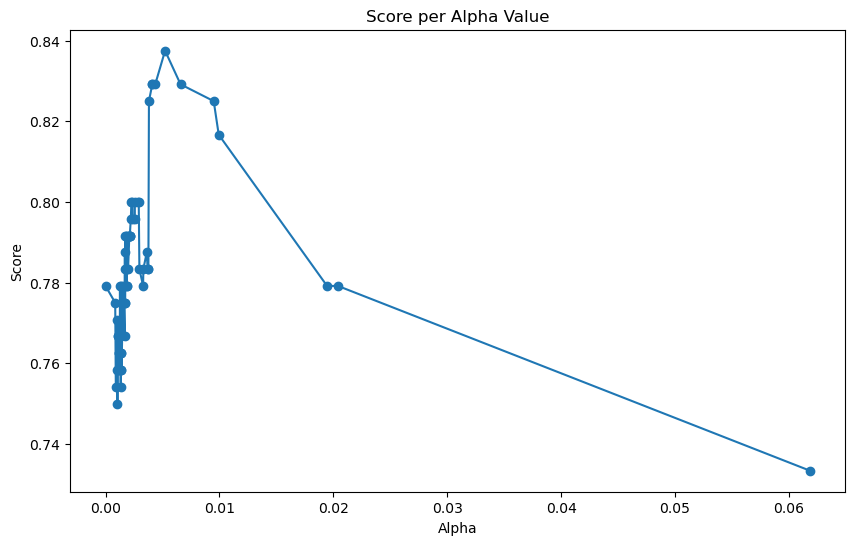

(0.005230125523012552, 0.8375)


In [26]:
unpruned_tree = DecisionTreeClassifier()

X_train, X_val, y_train, y_val = train_test_split(X , y, test_size = 0.2, random_state=15)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2 * X.shape[0]/X_train.shape[0],
                                                    random_state=15)

cost_path = unpruned_tree.cost_complexity_pruning_path(X_train, y_train)

subtrees = []
for alpha in cost_path.ccp_alphas:
    subtree = DecisionTreeClassifier(ccp_alpha=alpha)
    subtree.fit(X_train, y_train)
    subtrees.append(subtree)
    
subtree_scores = []
for tree in subtrees:
    score = tree.score(X_val, y_val)
    subtree_scores.append(score)
    
plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Score')
ax.set_title('Score per Alpha Value')
ax.plot(cost_path.ccp_alphas, subtree_scores, marker='o')
plt.show()

alpha_scores = tuple(zip(cost_path.ccp_alphas, subtree_scores))
print(max(alpha_scores, key=lambda x:x[1])) # Getting the max score not the max alpha

We get the highest score of 83.75% with the subtree that had an alpha = 0.05. We are now going to use this tree to calculate the accuracy on our test data with other metrics.


**CCP Alpha**

CCP Alpha, also known as Cost-Complexity Pruning Alpha, is a hyperparameter used in decision tree models, including Random Forest.

What does it do?

CCP Alpha controls the trade-off between the complexity of the tree and its accuracy. It's a regularization parameter that helps prevent overfitting by limiting the growth of the tree.

How does it work?

When training a decision tree, the algorithm tries to find the best split at each node by minimizing the cost function (e.g., Gini impurity or entropy). However, this can lead to overfitting, especially when the tree is deep.

CCP Alpha comes into play by adding a penalty term to the cost function, which increases with the complexity of the tree. The penalty term is proportional to the number of nodes in the tree.

By setting a value for CCP Alpha, you're telling the algorithm to balance the accuracy of the tree with its complexity. A higher value of CCP Alpha will result in a simpler tree, while a lower value will allow the tree to grow more complex.

In Random Forest

In Random Forest, CCP Alpha is used to control the complexity of each individual tree in the ensemble. By setting a value for CCP Alpha, you're influencing the overall complexity of the Random Forest model.

Tuning CCP Alpha

The optimal value of CCP Alpha depends on the specific problem and dataset. It's a hyperparameter that requires tuning, and you can use techniques like grid search or random search to find the best value.

In this guided project, we're using Random Forest to predict employee productivity, and CCP Alpha is one of the hyperparameters we can tune to improve the model's performance.

In [27]:
best_score_index = np.argmax(subtree_scores)
best_pruned_tree = subtrees[best_score_index]

test_score = best_pruned_tree.score(X_test, y_test)

print(f'Score on validation set: {round(subtree_scores[best_score_index], 2)}')
print(f'Score on test data: {round(test_score, 2)}')

Score on validation set: 0.84
Score on test data: 0.79


Our best tree which had an accuracy of around 85% failed to deliver the same results on the testing data. Let's plot the tree and see how it differs from our original tree.


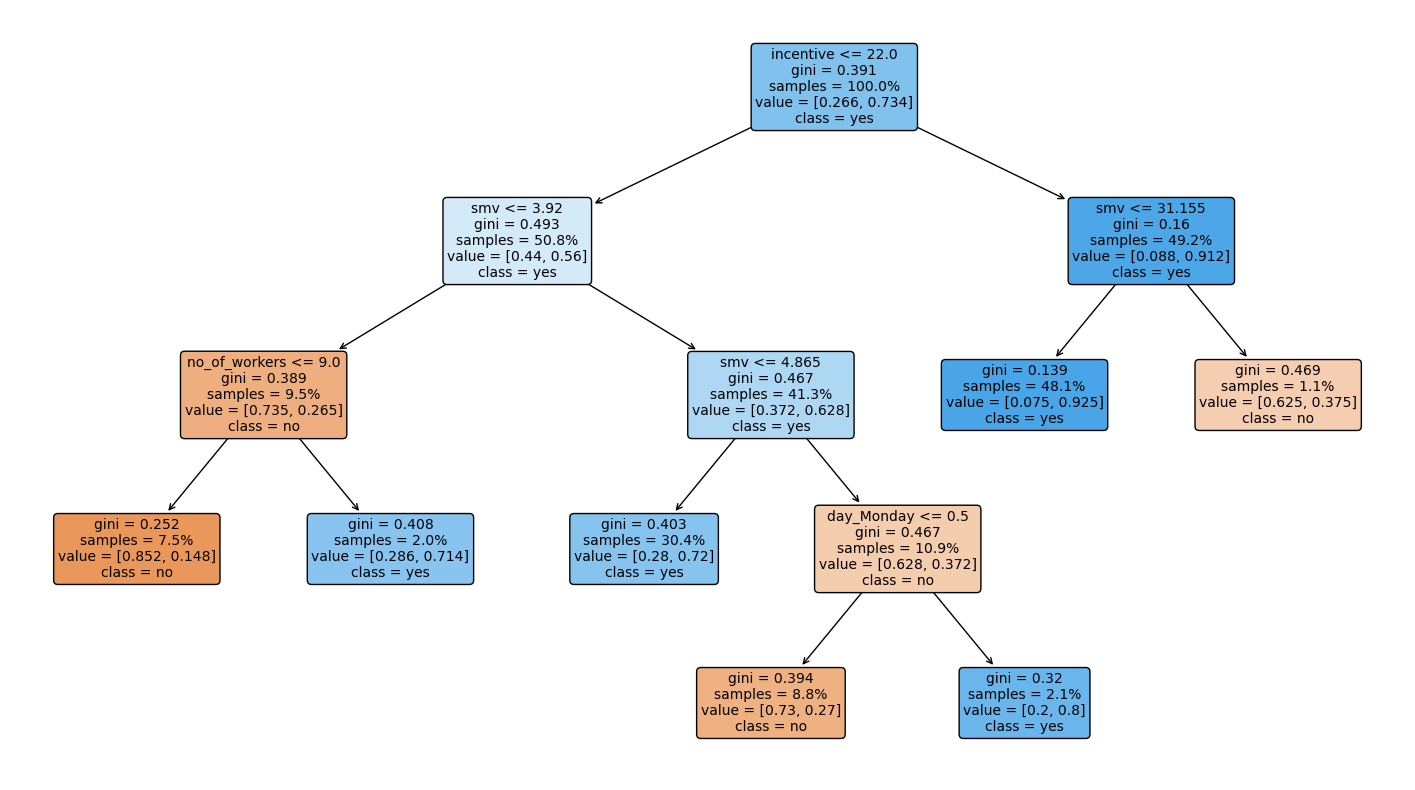

In [34]:
plt.figure(figsize=(18, 10))

feature_names = X.columns.tolist()
class_names = best_pruned_tree.classes_.tolist()
plot_tree(best_pruned_tree, feature_names=feature_names, class_names=class_names, filled=True, proportion=True,
          precision=3, rounded=True, fontsize=10)
plt.show()

### Comments
- The pruned tree has four levels in it.
- The leaf with the biggest sample size has 48.1% of samples in it which belongs to the 'yes' class.(Similar to the original tree).
Even though the tree performs good on the validation data, it performs poorly on unseen data.
- The last step in this project is to use Grid Search to make sure we are not overlooking any parameters that could have improved our model's performance.

**The Leaf with the Biggest Sample Size**

In a decision tree, a leaf refers to a node that has no child nodes. It's a terminal node where the tree stops splitting, and a prediction is made.

The sample size of a leaf refers to the number of training samples that end up in that leaf. In other words, it's the number of data points that are classified into that particular node.

When we talk about the leaf with the biggest sample size, we're referring to the leaf that has the largest number of training samples associated with it. This leaf is often the most "popular" or "dominant" node in the tree, as it's where the majority of the data points end up.

In the context of this guided project, the leaf with the biggest sample size might be interesting to explore because it could indicate:

A dominant pattern or trend in the data
A group of employees with similar characteristics or productivity levels
A cluster of data points that are more easily predictable by the model
By examining the leaf with the biggest sample size, we might gain insights into the underlying structure of the data and how the model is making predictions

The last step in this project is to use Grid Search to make sure we are not overlooking any parameters that could have improved our model's performance.

### Hyperparameter Optimization

In [28]:
parameters = {'criterion':['gini', 'entropy'],
            'class_weight':[None, 'balanced'],
            'min_samples_split':[12, 30, 48],
            'max_depth':list(range(3, 7)),
            'min_samples_leaf':list(range(9, 19, 3))}

tree = DecisionTreeClassifier()

grid_recall = GridSearchCV(tree, param_grid=parameters, scoring='accuracy', n_jobs=-1)

grid_recall.fit(X, y)

best_params = grid_recall.best_params_
best_estimator = grid_recall.best_estimator_
best_score = grid_recall.best_score_

print(best_params)
print(best_estimator)
print(best_score)

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 30}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=30)
0.798615760111576


The grid search fails to identify any parameters that may be better than a simple 3 level tree. It's intriguing but it happens because it's searching from the whole data rather just the training data.

### Conclusion

We started this project with the intention to find the factors that leads to workers reaching their productivity targets. During the feature selection stage, we discovered that the 'incentive' feature doesn't really have enough data points regarding higher incentives since most instances relate to lower incentives given to the employees. Due to these reasons, we didn't expect it to have much impact on our decision tree. Much to everyone's surprise, the 'incentive' predictor still managed to get a place on the root of every tree we produced, which says something.

If we had to recommend an approach to the garment factory's managers on achieving target productivity, we would go with increasing incentives since it plays a vital role in employees productivity.